In [1]:
%matplotlib notebook

In [2]:
#importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

In [3]:
#how many covid cases have we gone through?
covid = pd.read_csv("Data/weeklycovid.csv")
covid.head()

,weekending,Spec Tested,% Pos,% positive,Positive,Total Pos Cases
0,7-Mar,8320,11.8,0.118,982,982
1,14-Mar,38482,9.5,0.095,3656,4638
2,21-Mar,89991,9.0,0.090,8099,12737
3,28-Mar,112188,13.0,0.130,14584,27321
4,4-Apr,663328,22.0,0.220,145932,173253


In [4]:
covid = covid[["weekending","Spec Tested", "Total Pos Cases"]]
covid.head()

,weekending,Spec Tested,Total Pos Cases
0,7-Mar,8320,982
1,14-Mar,38482,4638
2,21-Mar,89991,12737
3,28-Mar,112188,27321
4,4-Apr,663328,173253


In [5]:
#importing console sales data for 2020 and putting 0's instead of NA
games20 = pd.read_csv("Data/consolesales.csv")
games20 = games20.fillna(0)
games20.head()

,weekending,Switch,PS4,Xbox 1,3ds,PS5,XboxXS
0,4-Jan,140734,66076,58131,2158,0.0,0.0
1,11-Jan,106199,47115,31751,1697,0.0,0.0
2,18-Jan,94798,42145,30057,1433,0.0,0.0
3,25-Jan,88387,40840,29310,1216,0.0,0.0
4,1-Feb,88193,43714,27554,1249,0.0,0.0


In [6]:
#a dataframe with console sales with the same weeks as 2019
games202 = games20.iloc[24:51]
games202 = games202.drop(columns=["3ds"])
games202

,weekending,Switch,PS4,Xbox 1,PS5,XboxXS
24,27-Jun,141660,84543,59466,0.0,0.0
25,4-Jul,123628,69381,48764,0.0,0.0
26,11-Jul,118323,61047,45442,0.0,0.0
27,18-Jul,122296,66261,39861,0.0,0.0
28,25-Jul,115978,56450,34706,0.0,0.0
29,1-Aug,119087,50597,28204,0.0,0.0
30,8-Aug,116778,48162,23882,0.0,0.0
31,15-Aug,105882,39039,12220,0.0,0.0
32,22-Aug,114765,43664,43570,0.0,0.0
33,29-Aug,120018,44475,14363,0.0,0.0


In [7]:
#console sales data for 2019
games19 = pd.read_csv("Data/consolesales2019.csv")
games19

,weekending,Switch,PS4,Xbox 1
0,29-Jun,104728,46050,28320
1,6-Jul,86648,44940,25825
2,13-Jul,83028,48312,25050
3,20-Jul,83659,52802,28154
4,27-Jul,77891,50652,27396
5,3-Aug,76425,53426,25925
6,10-Aug,70734,55264,25474
7,17-Aug,74147,53619,25110
8,24-Aug,75948,55225,28397
9,31-Aug,87737,54547,28911


In [8]:
#meant to count through the rows and make a list consisting of the counts
#yes2 refers to 2019 and yes refers to 2020
yes2 = []
yes2l = []
yes = []
yesl = []
for i in games20["weekending"]:
    str(i)
    yes.append(i)
yes
for i in range(len(yes)):
    yesl.append(i)
for i in games19["weekending"]:
    str(i)
    yes2.append(i)
for i in range(len(yes2)):
    yes2l.append(i)

<IPython.core.display.Javascript object>


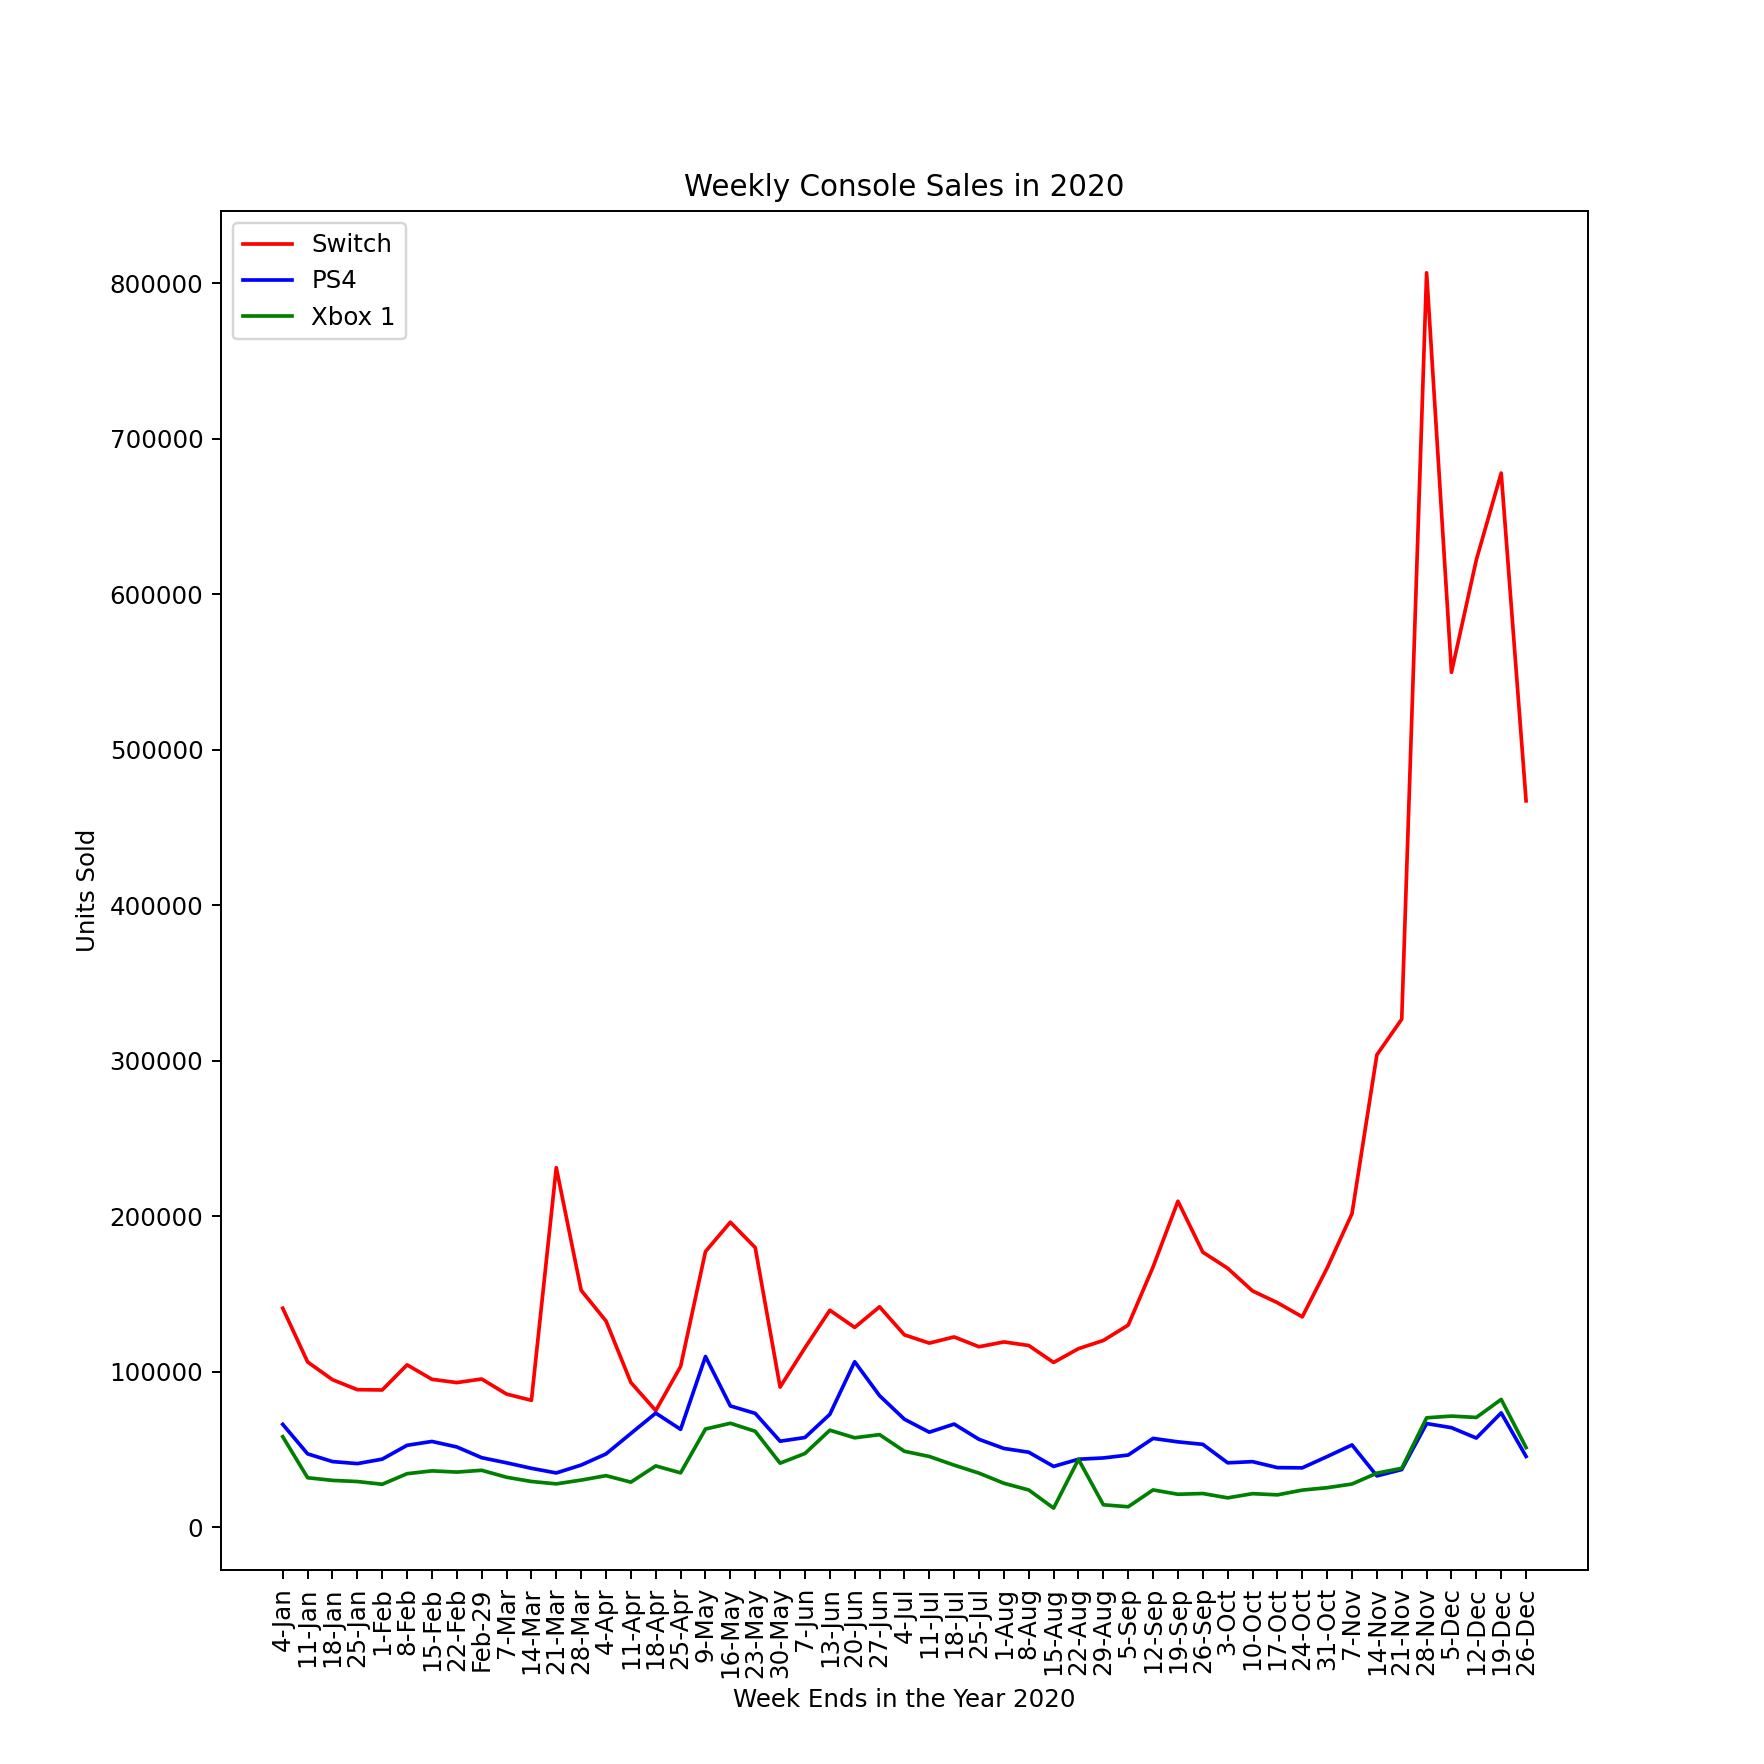

<IPython.core.display.Javascript object>


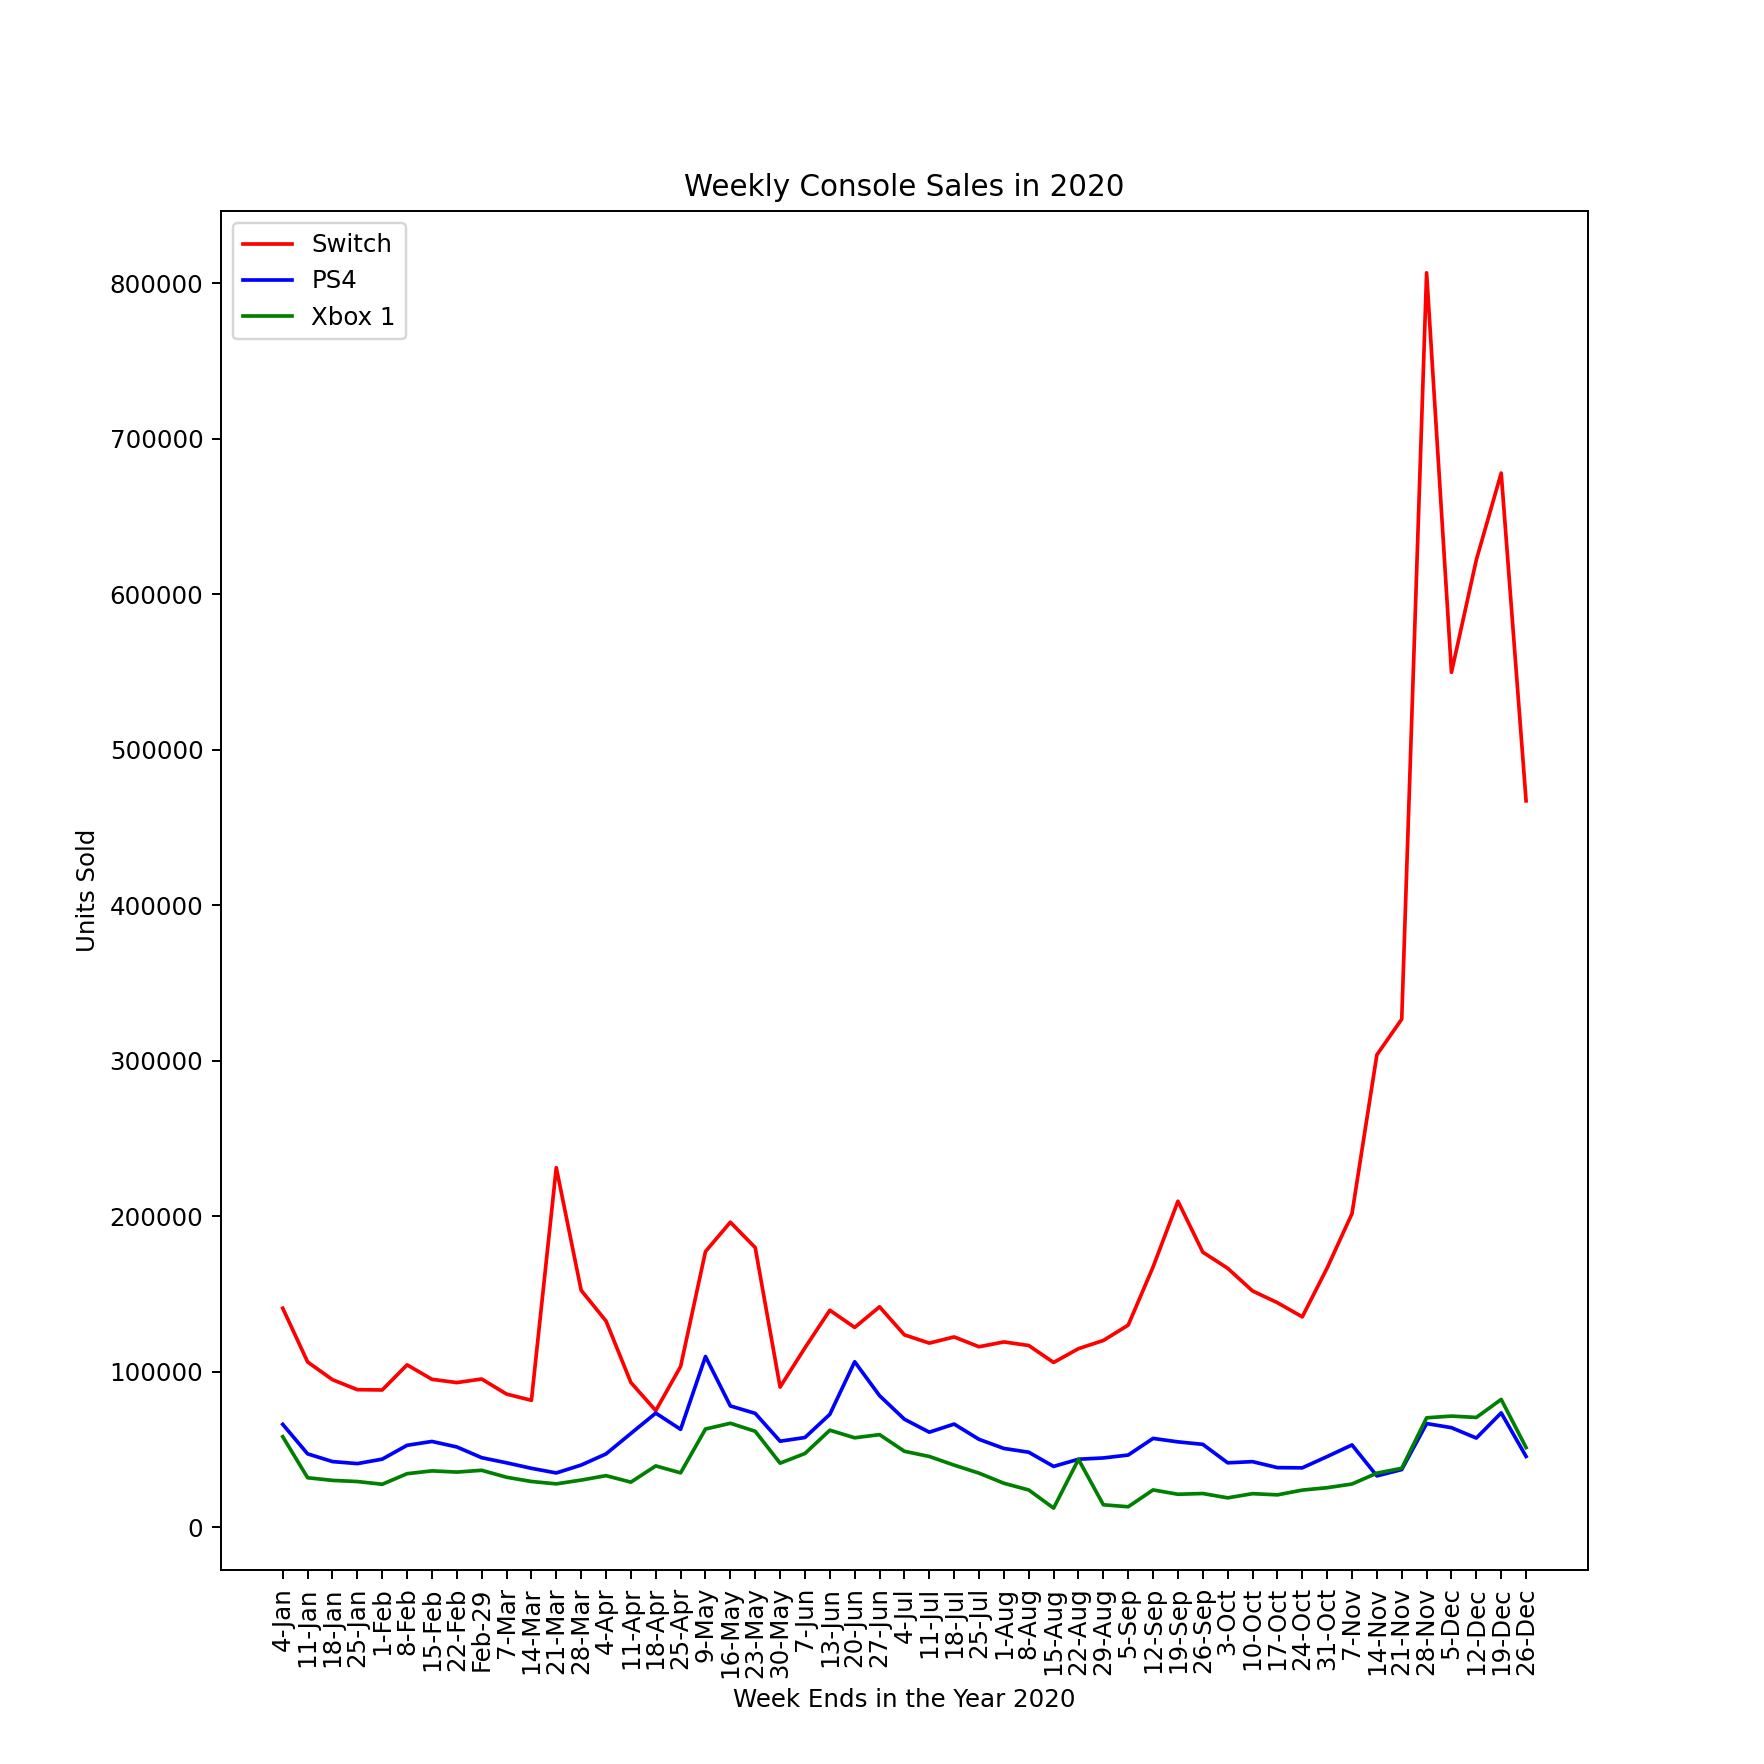

In [35]:
#plotting the console sales for mid-2019 and on
plt.title("Weekly Console Sales in mid-2019 and On")
plt.xticks(yes2l, yes2, rotation = 'vertical')
plt.xlabel("Week Ends in the Year 2019")
plt.ylabel("Units Sold in Millions")
Switch, = plt.plot(games19["weekending"], games19["Switch"], color="red", label="Switch")
PS4, = plt.plot(games19["weekending"], games19["PS4"], color="blue", label="PS4")
Xbone, = plt.plot(games19["weekending"], games19["Xbox 1"], color="green", label="Xbox 1")
plt.legend(handles = [Switch, PS4, Xbone,],loc="upper left")
plt.savefig("salesmid2019on.png")
plt.figure(figsize=(10, 10))

<IPython.core.display.Javascript object>


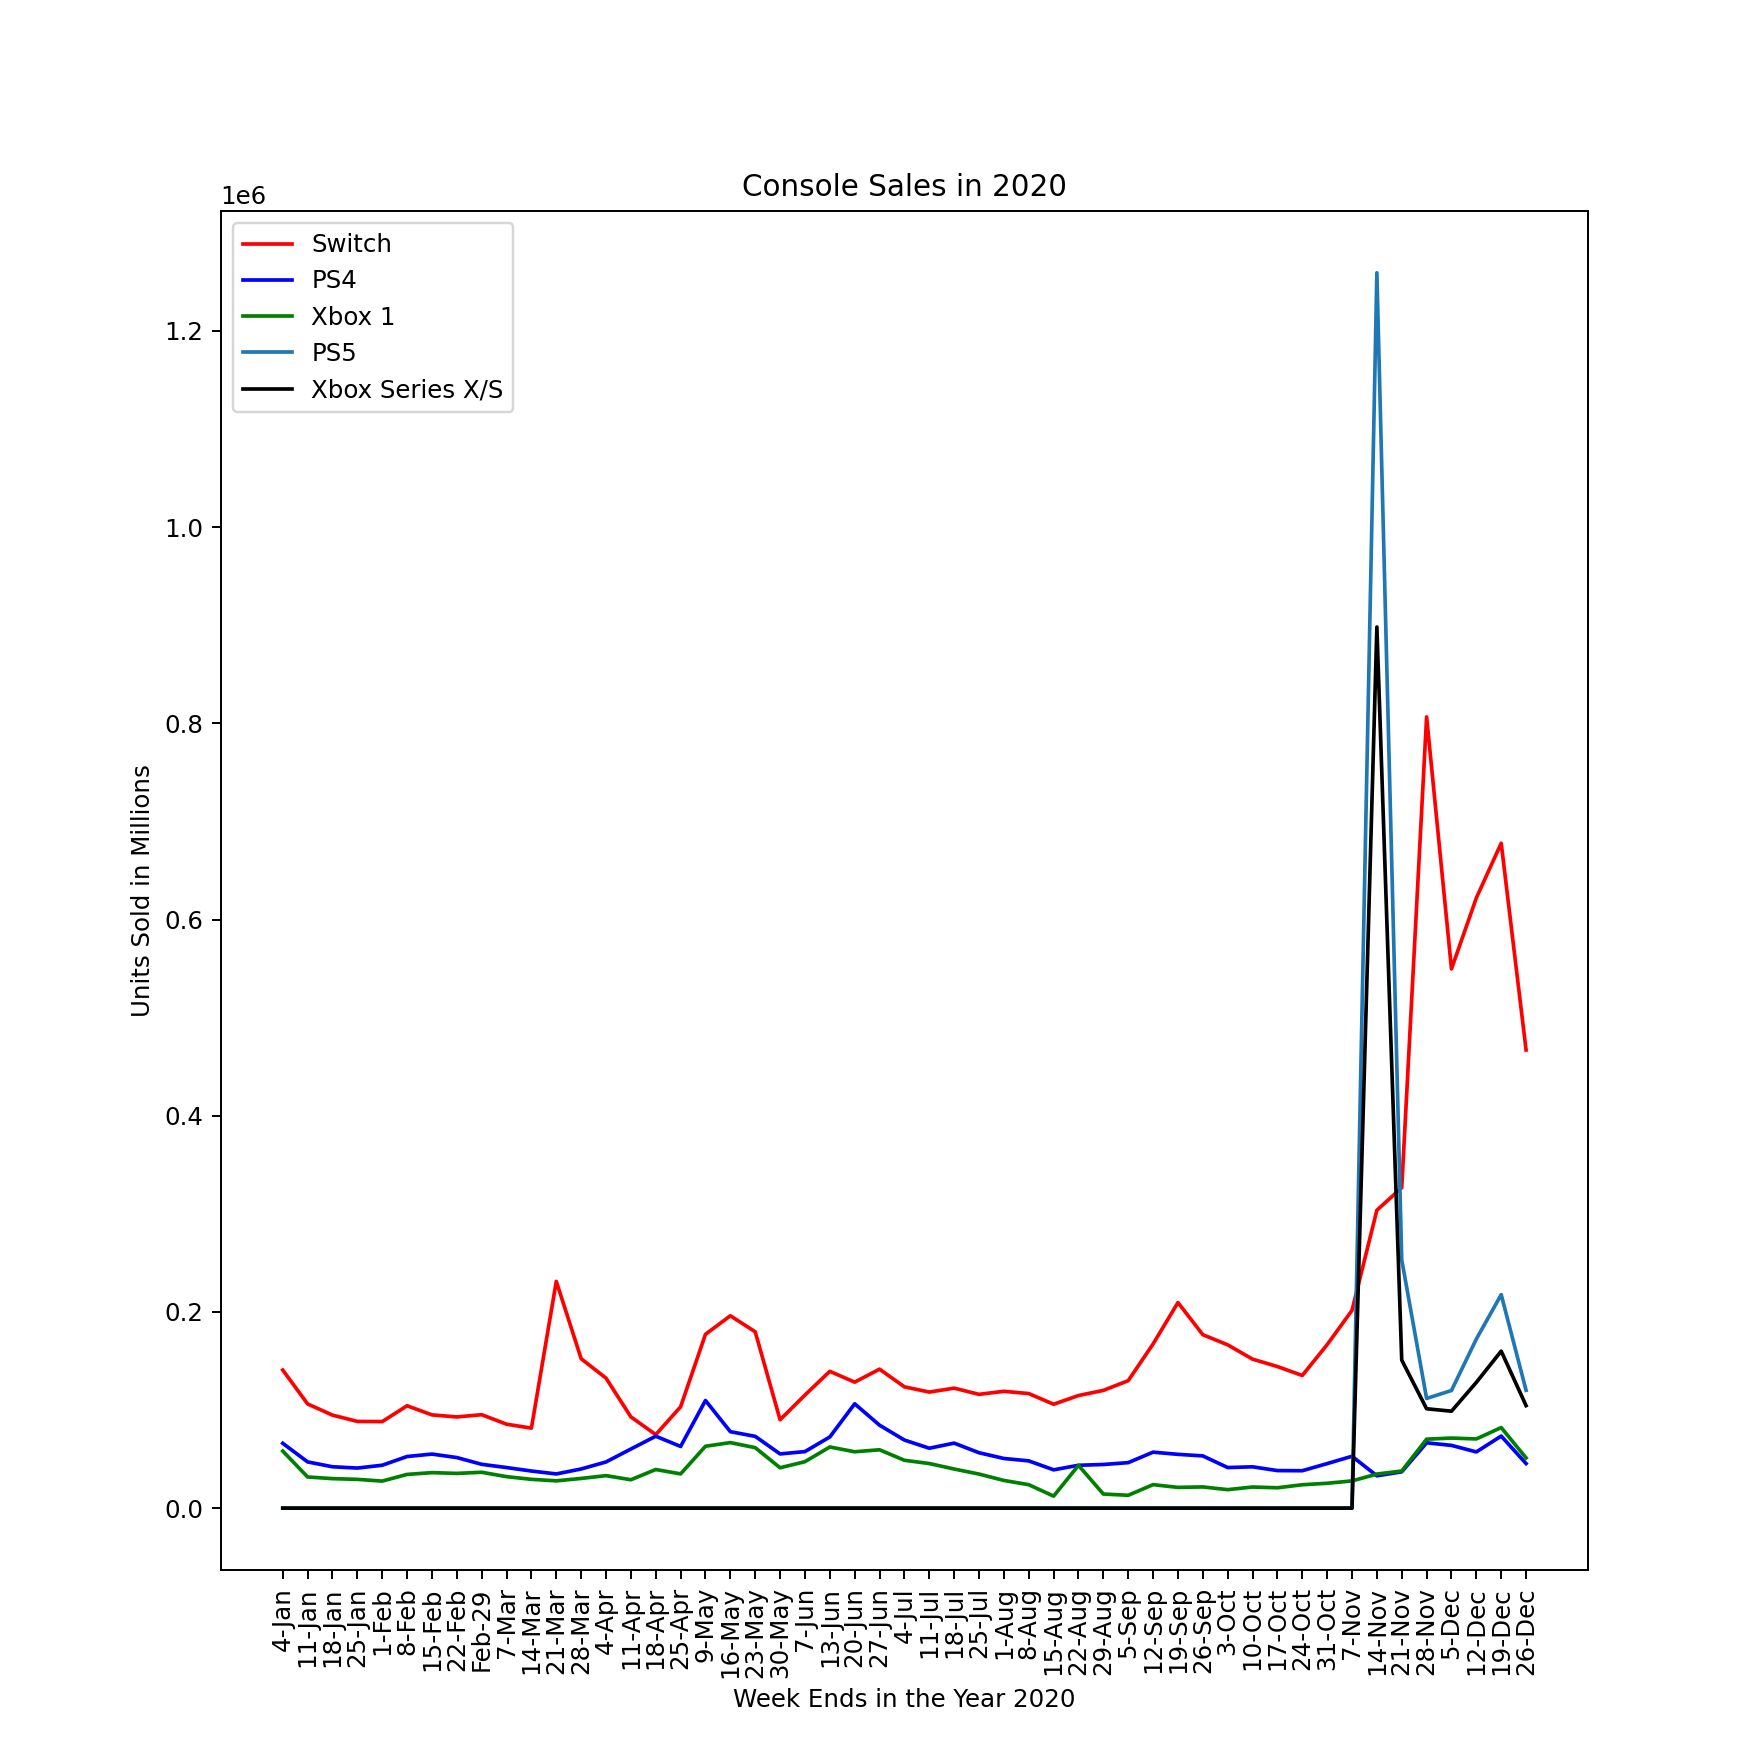

<IPython.core.display.Javascript object>


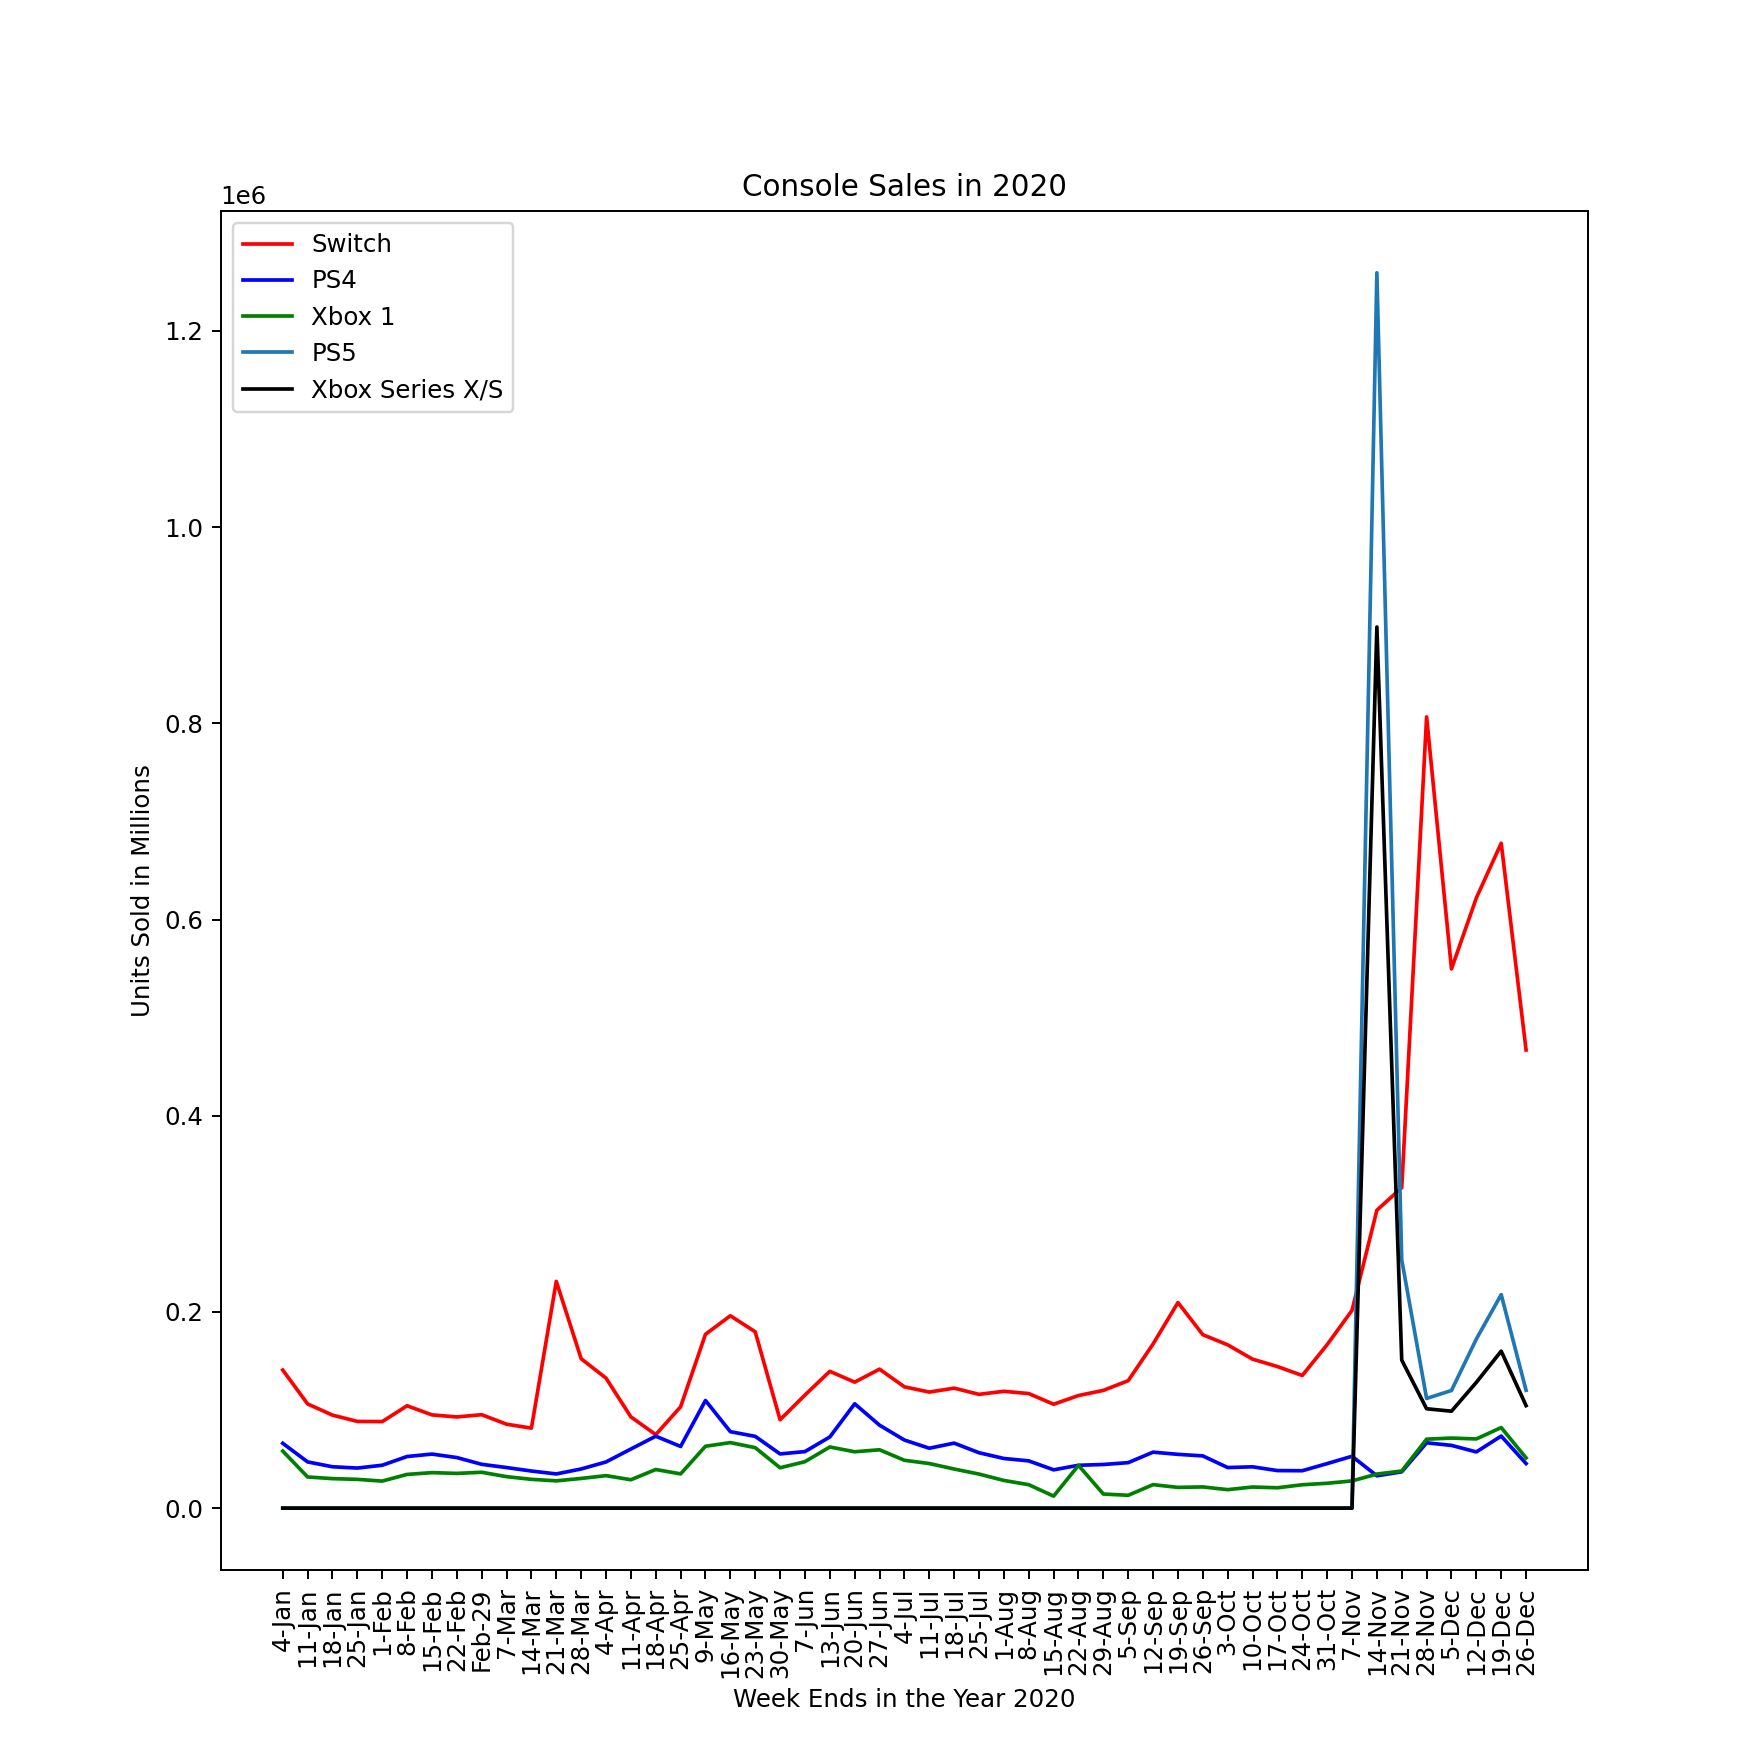

In [36]:
#plotting the console sales for 2020
plt.title("Weekly Console Sales in 2020")
plt.xticks(yesl, yes, rotation = 'vertical')
plt.xlabel("Week Ends in the Year 2020")
plt.ylabel("Units Sold")
Switch, = plt.plot(games20["weekending"], games20["Switch"], color="red", label="Switch")
PS4, = plt.plot(games20["weekending"], games20["PS4"], color="blue", label="PS4")
Xbone, = plt.plot(games20["weekending"], games20["Xbox 1"], color="green", label="Xbox 1")
plt.legend(handles = [Switch, PS4, Xbone,],loc="upper left")
plt.savefig("sales2020.png")
plt.figure(figsize=(10, 10))

<IPython.core.display.Javascript object>


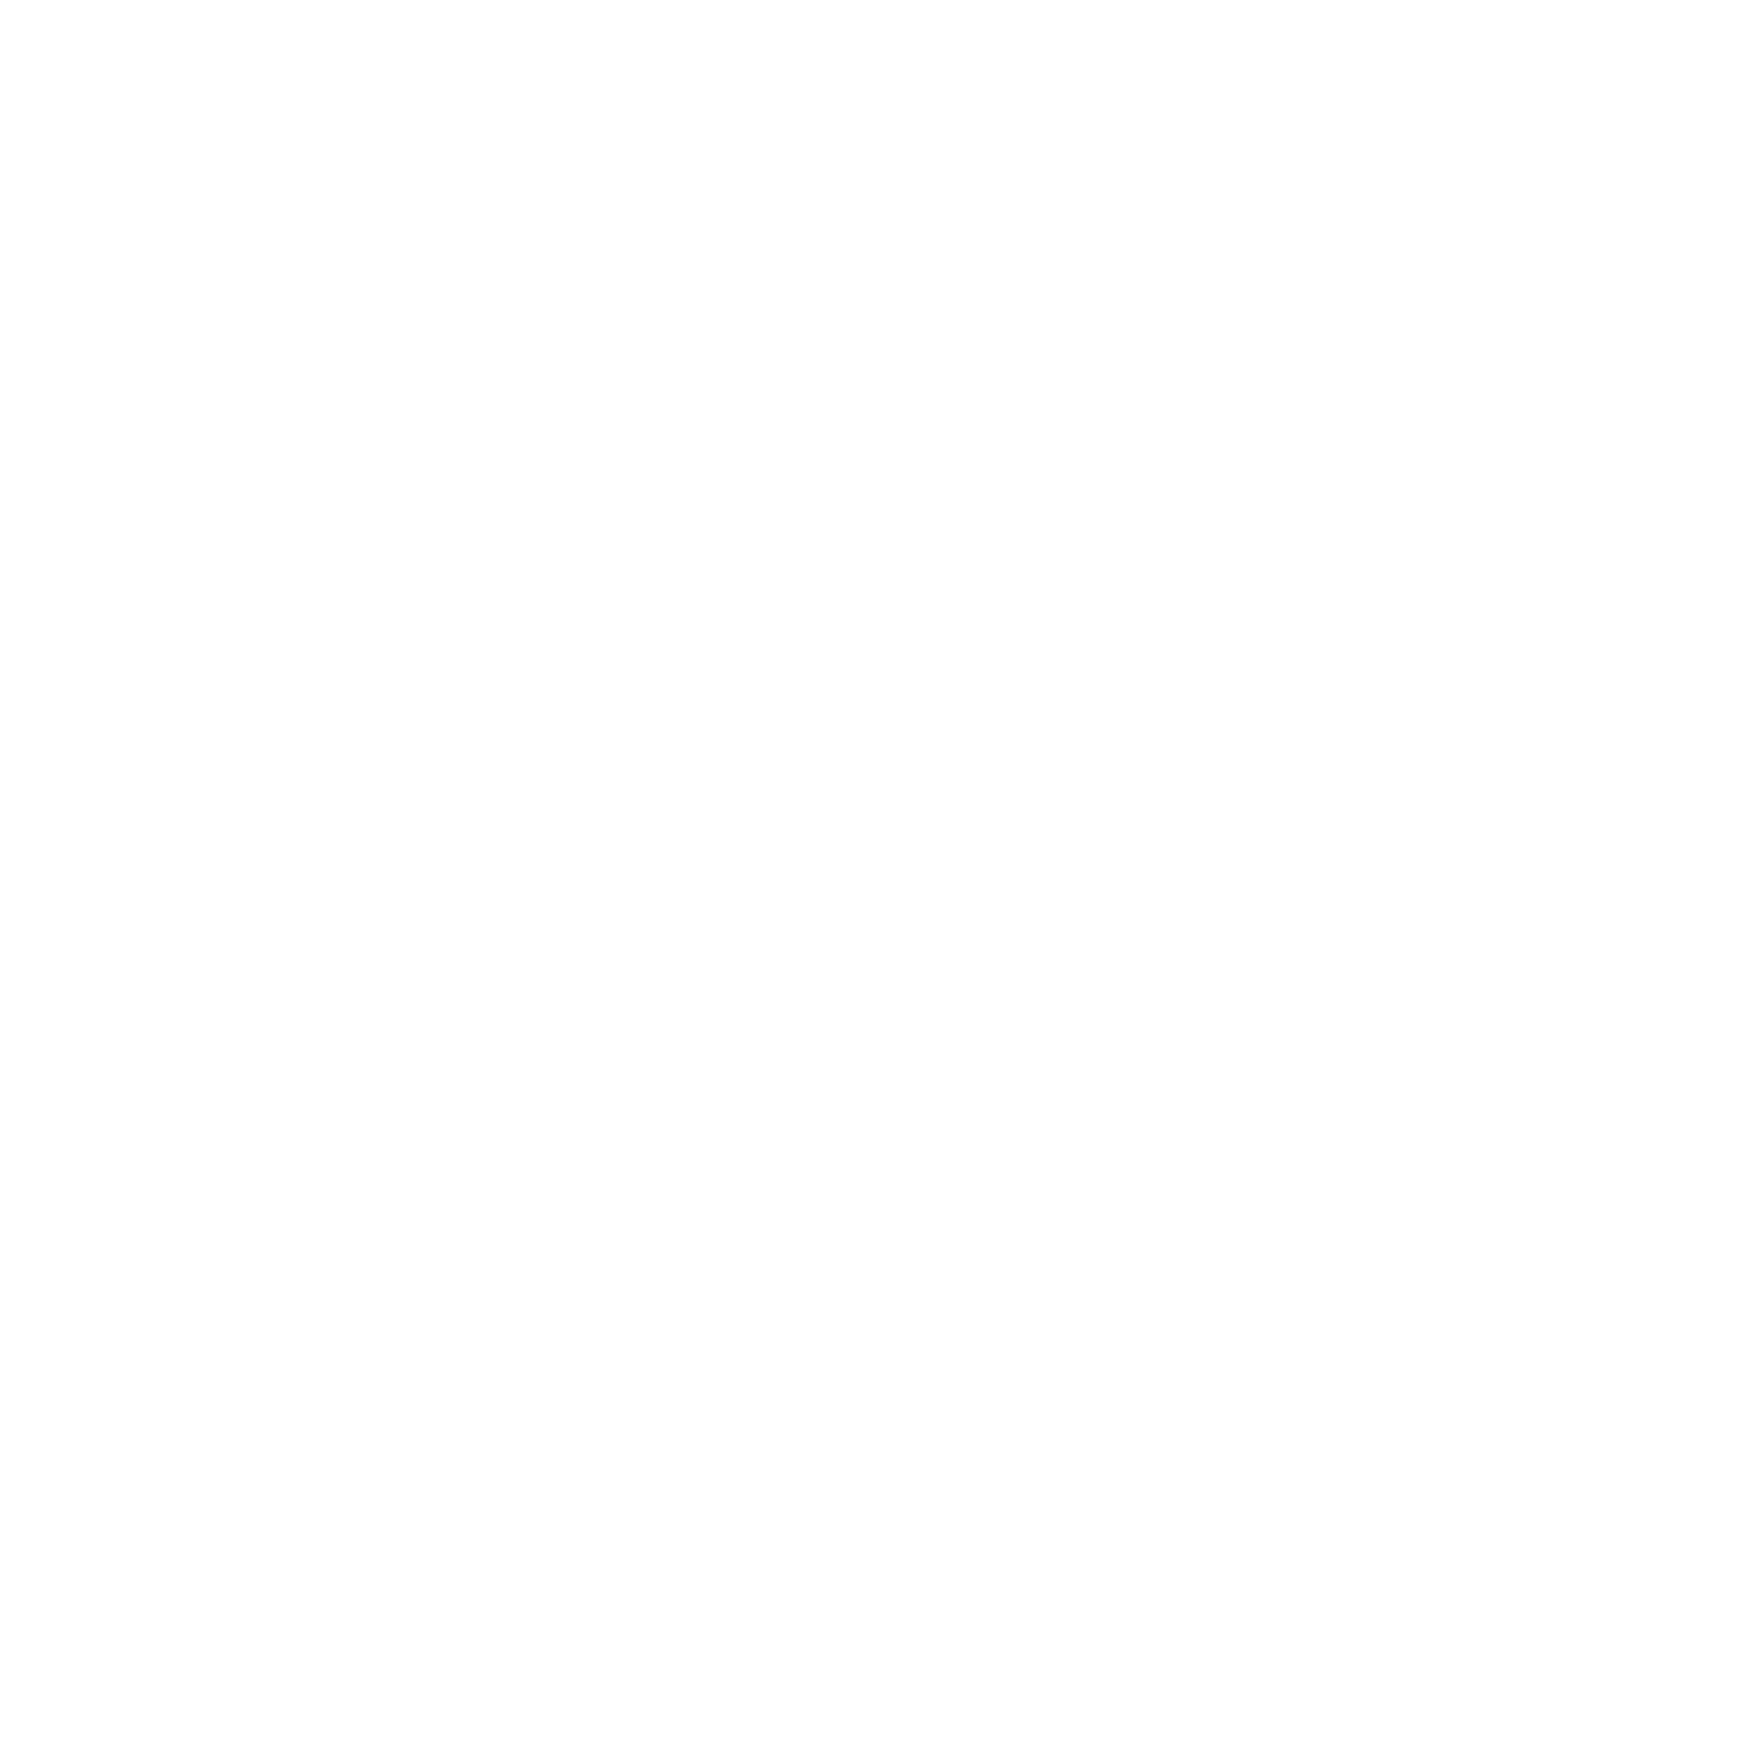

<IPython.core.display.Javascript object>


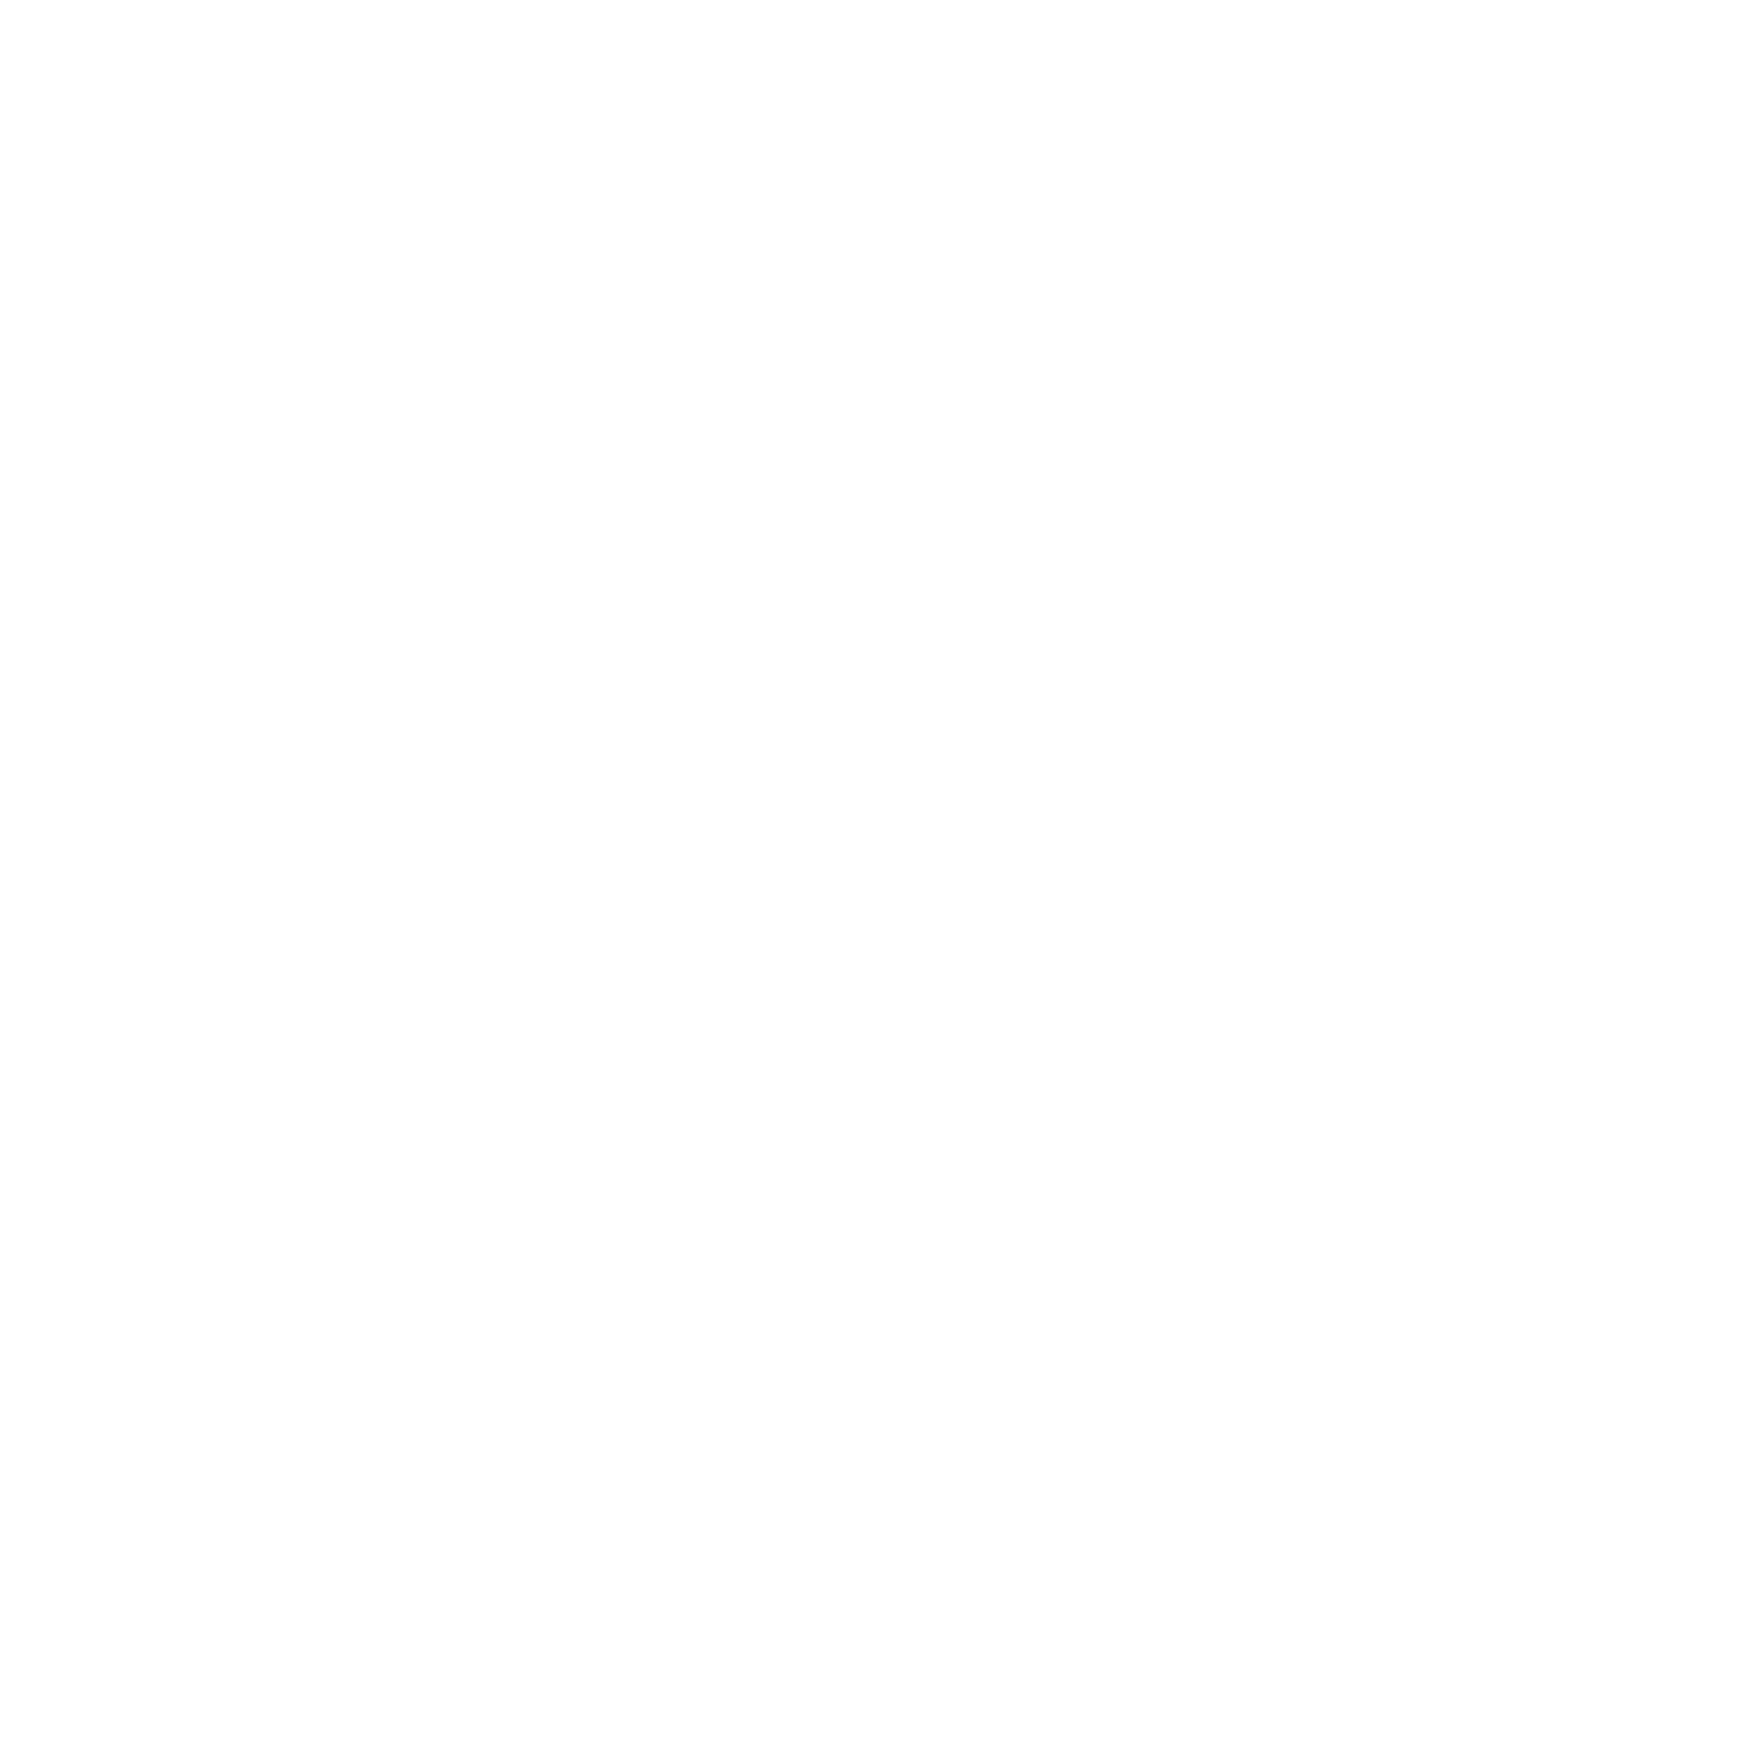

In [37]:
#2020, but with the addtion of the PS5 and Xbox Series consoles
plt.title("Console Sales in 2020")
plt.xticks(yesl, yes, rotation = 'vertical')
plt.xlabel("Week Ends in the Year 2020")
plt.ylabel("Units Sold in Millions")
Switch, = plt.plot(games20["weekending"], games20["Switch"], color="red", label="Switch")
PS4, = plt.plot(games20["weekending"], games20["PS4"], color="blue", label="PS4")
Xbone, = plt.plot(games20["weekending"], games20["Xbox 1"], color="green", label="Xbox 1")
PS5, = plt.plot(games20["weekending"], games20["PS5"], label="PS5")
XboxXS, = plt.plot(games20["weekending"], games20["XboxXS"], color="black", label="Xbox Series X/S")
plt.legend(handles = [Switch, PS4, Xbone, PS5, XboxXS,],loc="upper left")
plt.savefig("gsales2020with.png")
plt.figure(figsize=(10, 10))

In [12]:
merged = pd.merge(covid, games20, how="left", on="weekending")
merged.head()

,weekending,Spec Tested,Total Pos Cases,Switch,PS4,Xbox 1,3ds,PS5,XboxXS
0,7-Mar,8320,982,85547,41354,32076,1233,0.0,0.0
1,14-Mar,38482,4638,81541,37817,29345,1300,0.0,0.0
2,21-Mar,89991,12737,231156,34841,27810,1397,0.0,0.0
3,28-Mar,112188,27321,152297,39904,30249,1380,0.0,0.0
4,4-Apr,663328,173253,132523,47071,33096,1487,0.0,0.0


In [13]:
stats.ttest_ind(merged["Total Pos Cases"], merged["Spec Tested"])

Ttest_indResult(statistic=1.9781291675969526, pvalue=0.051272364709757885)

In [14]:
#using this cell to get all the means of each console and covid
sw = merged["Switch"].mean()
cases = merged["Total Pos Cases"].mean()

In [15]:
#stats.ttest_ind(cases, sw, equal_var=False)

In [16]:
#finding the t score between covid cases and switch sales
var_a = merged["Switch"].var(ddof=1)
var_b = merged["Total Pos Cases"].var(ddof=1)
s = np.sqrt((var_a + var_b)/2)
t = (sw - cases)/(s*np.sqrt(2/merged["Switch"].count()))
t

-7.726952950926032

In [17]:
#jun29 2019 = 26th week of th year

In [18]:
sw19 = games19["Switch"].mean()
sw20 = games202["Switch"].mean()
print(sw19, sw20)

208145.2962962963 244503.77777777778


In [19]:
# var_a = games19["Switch"].var(ddof=1)
# var_b = games202["Switch"].var(ddof=1)
# s = np.sqrt((var_a + var_b)/2)
# t = (sw19 - sw20)/(s*np.sqrt(2/sw19["Switch"].count()))
# t

In [20]:
#Nintendo Switch t test value; very significant
stats.ttest_ind(games19["Switch"], games202["Switch"])

Ttest_indResult(statistic=-0.6263323731692041, pvalue=0.5338369071681148)

In [21]:
#PS4 t test results; somehow insignificant
ps19 = games19["PS4"].mean()
ps20 = games202["PS4"].mean()
stats.ttest_ind(games19["PS4"], games202["PS4"])

Ttest_indResult(statistic=2.05970571809461, pvalue=0.044448670967357475)

In [22]:
#Xbox 1 t test results; slightly significant
stats.ttest_ind(games19["Xbox 1"], games202["Xbox 1"])

Ttest_indResult(statistic=1.7333198735869957, pvalue=0.08896550920106473)